In [91]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd

# A logistic regression for the AND 

In [75]:
X = np.asarray([[0,0],[0,1],[1,0],[1,1]])
Y = np.asarray([[0],[0],[0],[1]])

x = tf.placeholder(tf.float32, [None, 2])
y = tf.placeholder(tf.float32, [None,1])

W= tf.Variable(tf.random_uniform([2,1], -1, 1), name="W")
b = tf.Variable(tf.zeros([1]), name="b")

V = tf.nn.sigmoid(tf.matmul(x,W)+b)

lossfn = tf.reduce_mean(tf.reduce_sum((y-V)**2)) 
optimizer = tf.train.GradientDescentOptimizer(0.01).minimize(lossfn)

init = tf.global_variables_initializer()
sess = tf.Session()

In [76]:
sess.run(init)
for i in range(5000):
  sess.run(optimizer, feed_dict={x: X, y: Y})

In [77]:
correct_prediction = tf.equal(tf.round(V),y)
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print(sess.run(accuracy, feed_dict={x: X, y: Y}))

1.0


In [78]:
w=[sess.run(b, feed_dict={x: X, y: Y})[0]]+[i[0] for i in sess.run(W, feed_dict={x: X, y: Y})]

In [79]:
gradient = ((w[0]/w[2]))/((-w[0]/w[1]))

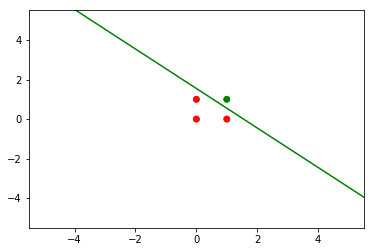

In [80]:
plt.scatter(X[:,0],X[:,1],color=['green' if i==1 else 'red' for i in Y])
randompoints = np.linspace(-10,10,10) # 100 numeros espaciados
plt.plot(randompoints,-w[0]/w[2] + gradient*randompoints ,color='green')
plt.ylim([-5.5,5.5])
plt.xlim([-5.5,5.5])
plt.show()

sess.close()

# A logistic regression for the XOR

0.25


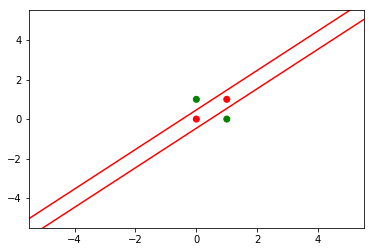

In [81]:
X=np.asarray([[0,0],[0,1],[1,0],[1,1]])
Y=np.asarray([[0],[1],[1],[0]])

x = tf.placeholder(tf.float32, [None, 2])
y = tf.placeholder(tf.float32, [None,1])

W= tf.Variable(tf.random_uniform([2,1], -1, 1), name="W")
b = tf.Variable(tf.zeros([1]), name="b")

V = tf.nn.sigmoid(tf.matmul(x,W)+b)

lossfn = tf.reduce_mean(tf.reduce_sum((y-V)**2)) 
optimizer = tf.train.GradientDescentOptimizer(0.01).minimize(lossfn)

init = tf.global_variables_initializer()
sess = tf.Session()

sess.run(init)
for i in range(5000):
  sess.run(optimizer, feed_dict={x: X, y: Y})

correct_prediction = tf.equal(tf.round(V),y)
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print(sess.run(accuracy, feed_dict={x: X, y: Y}))

w=[sess.run(b, feed_dict={x: X, y: Y})[0]]+[i[0] for i in sess.run(W, feed_dict={x: X, y: Y})]

gradient = ((w[0]/w[2]))/((-w[0]/w[1]))

plt.scatter(X[:,0],X[:,1],color=['green' if i==1 else 'red' for i in Y])

boundary = np.linspace(-5.5,5.5,100)# 100 numeros espaciados
plt.plot(boundary,boundary - gradient/2,c='red')
plt.plot(boundary,boundary + gradient/2,c='red')
plt.ylim([-5.5,5.5])
plt.xlim([-5.5,5.5])
plt.show()

sess.close()

# Train a ANN for the XOR problem

In [113]:
X=np.asarray([[0,0],[0,1],[1,0],[1,1]])
Y=np.asarray([[0],[1],[1],[0]])

input_size=2 # my future layer1
output_layer_size=1 # my future layer3
hidden_layer_size=2 # my future layer2

layer1 = tf.placeholder(tf.float32, shape=[4,2])
W_layer1 = tf.Variable(tf.random_uniform([input_size,hidden_layer_size], -1, 1))
b_layer1 = tf.Variable(tf.zeros([hidden_layer_size]))


layer2 = tf.sigmoid(tf.matmul(layer1, W_layer1) + b_layer1)
W_layer2 = tf.Variable(tf.random_uniform([hidden_layer_size,output_layer_size], -1, 1))
b_layer2 = tf.Variable(tf.zeros([output_layer_size]))

layer3 = tf.placeholder(tf.float32, shape=[4,1])
output = tf.sigmoid(tf.matmul(layer2, W_layer2) + b_layer2)

lossfn = tf.reduce_mean(((layer3 * tf.log(output)) + ((1 - layer3) * tf.log(1.0 - output))) * -1)
optimizer = tf.train.GradientDescentOptimizer(0.01).minimize(lossfn)

init = tf.global_variables_initializer()
sess = tf.Session()

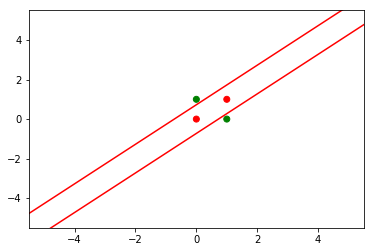

In [114]:
sess.run(init)
for i in range(1000):
  sess.run(optimizer, feed_dict={layer1: X, layer3: Y})

w0 = sess.run(b_layer2[0])
w1 = sess.run(W_layer2[0][0])
w2 = sess.run(W_layer2[1][0])

gradient = ((w0/w2))/((-w0/w1))

boundary = np.linspace(-5.5,5.5,100)# 100 numeros espaciados
plt.plot(boundary,boundary - gradient/2,c='red')
plt.plot(boundary,boundary + gradient/2,c='red')
plt.scatter(X[:,0], X[:,1], color=["green" if i==1 else "red" for i in Y])
plt.ylim([-5.5,5.5])
plt.xlim([-5.5,5.5])
plt.show()

sess.close()

# Train a ANN that identifies points inside a circle

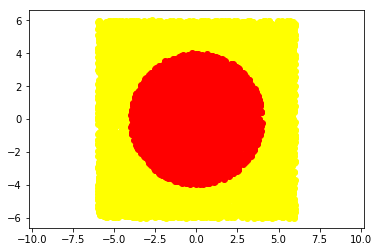

In [126]:
#create a circle
x1 = np.array([np.random.uniform(-6,6) for i in range(10000)])
x2 = np.array([np.random.uniform(-6,6) for i in range(10000)])

circle=pd.DataFrame(x1,columns=['x1'])
circle['x2']=x2 
circle['x1^2']=circle['x1']**2
circle['x2^2']=circle['x1']**2
circle['y']=(circle['x1']**2+circle['x2']**2).apply(lambda x: 1 if x<=16 else 0)

plt.scatter(circle['x1'],circle['x2'],color='yellow')
plt.scatter(circle[circle['y']==1]['x1'],circle[circle['y']==1]['x2'],color='red')
plt.axis("equal")
plt.show()

X=np.asarray(circle[['x1','x2']]) 
Y=np.asarray(circle[['y']])

In [127]:
input_size=2
hidden_layer_size=4
middle_layer_size=4
output_layer_size=1
x = tf.placeholder(tf.float32,shape=[None,input_size])
y = tf.placeholder(tf.float32,shape=[None,output_layer_size])

W_layer1 = tf.Variable(tf.random_uniform([input_size,middle_layer_size], -1, 1))
b_layer1 = tf.Variable(tf.zeros([middle_layer_size]))

W_layer2 = tf.Variable(tf.random_uniform([hidden_layer_size,output_layer_size], -1, 1))
b_layer2 = tf.Variable(tf.zeros([output_layer_size]))

hidden_1 = tf.nn.sigmoid(tf.matmul(x,W_layer1)+b_layer1)
predict = tf.nn.sigmoid(tf.matmul(hidden_1,W_layer2)+b_layer2)
lossfn = tf.reduce_mean(( (y * tf.log(predict) + ((1 - y) * tf.log(1.0 - predict)) ) * -1))

optimizer = tf.train.GradientDescentOptimizer(0.01).minimize(lossfn)

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

0.6496


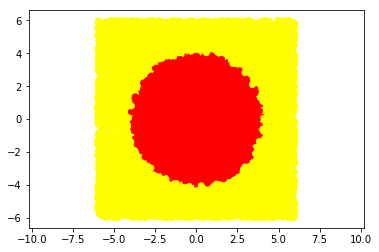

In [132]:
for i in range(1000):
    sess.run(optimizer, feed_dict={x: X, y: Y})
    
correct_prediction = tf.equal(tf.round(predict),y) 
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print(sess.run(accuracy, feed_dict={x: X, y: Y}))

prediction = sess.run(predict,feed_dict={x:X})
plt.scatter(X[:,0],X[:,1],color=['red' if i==1 else 'yellow' for i in Y])
plt.ylim([0,2])
plt.xlim([0,2])
plt.axis("equal")
plt.show()